In [121]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
import pandas as pd

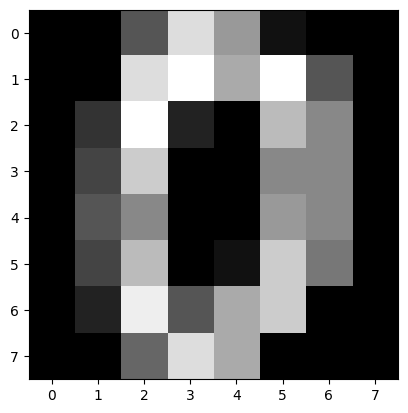

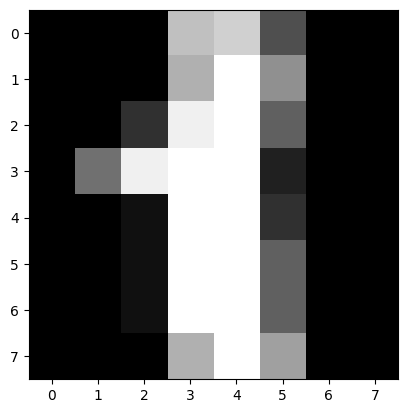

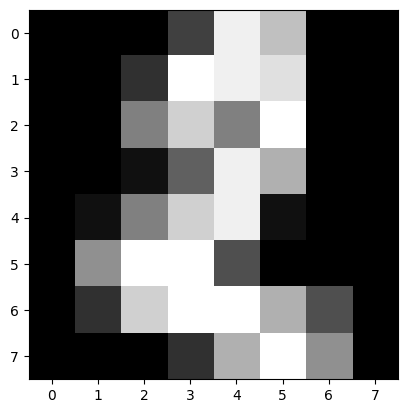

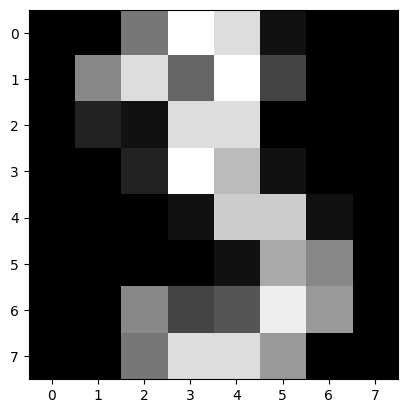

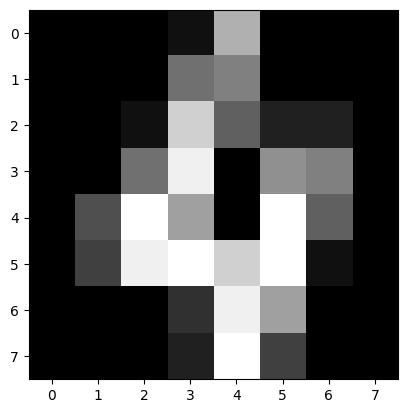

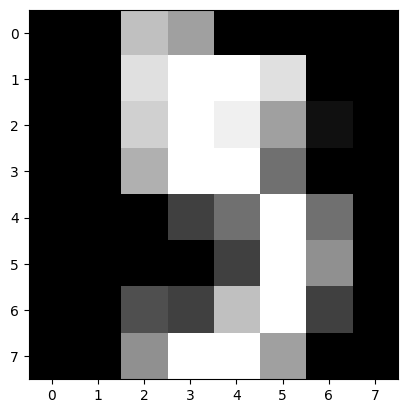

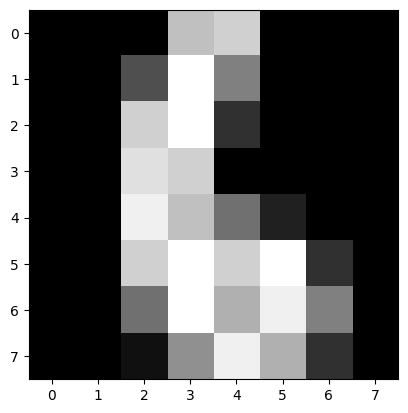

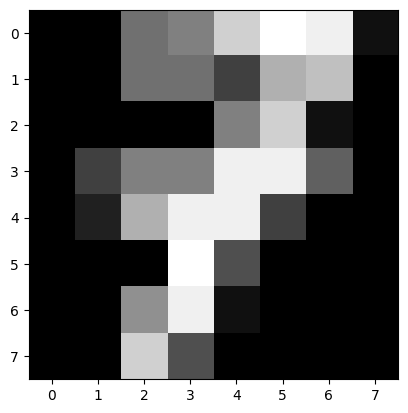

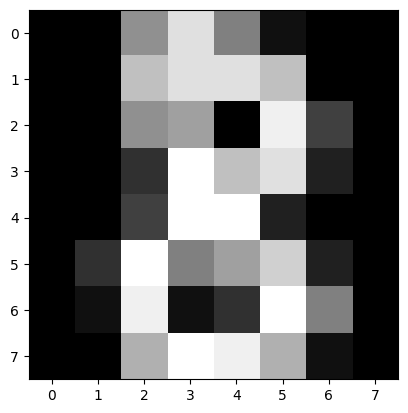

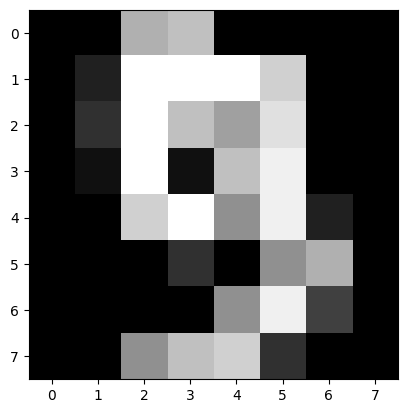

In [37]:
a = load_digits()
list(a)
for i in range(10):
    plt.imshow(a.images[i],cmap="gray")
    plt.show()

In [ ]:
#our goal is to plot labels in a feature space so we choose here to plot any 2 pixels(features) for 2 no.s
b = np.array(np.where(a.target==1))[0]
c = np.array(np.where(a.target==0))[0]
pixel_0_4= [a.data[i][4] for i in c]     #Pixel 4 of no. 0
pixel_0_5 = [a.data[i][5] for i in c]
pixel_1_4 = [a.data[i][4] for i in b]     ##Pixel 4 of no. 1
pixel_1_5 = [a.data[i][5] for i in b]

Text(0.5, 1.0, '1 and 0')

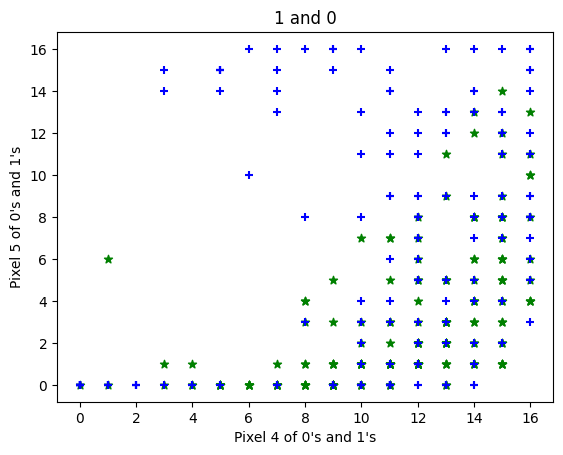

In [285]:
plt.scatter(pixel_0_4,pixel_0_5,color="green",marker='*')
plt.scatter(pixel_1_4,pixel_1_5,color="blue",marker='+')
plt.xlabel("Pixel 4 of 0's and 1's")
plt.ylabel("Pixel 5 of 0's and 1's")
plt.title("1 and 0")

Text(0.5, 1.0, '5 and 6')

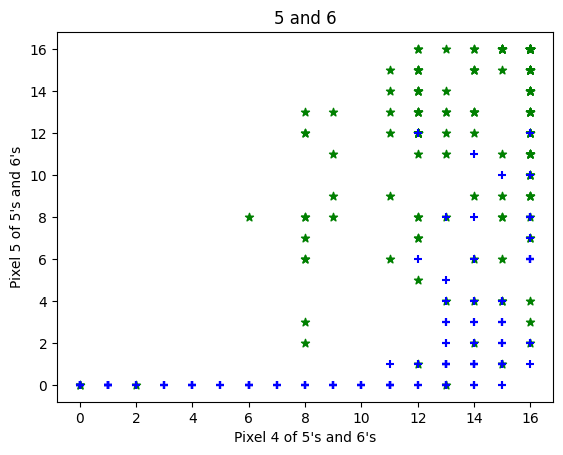

In [286]:
b = np.array(np.where(a.target==5))[0]
c = np.array(np.where(a.target==6))[0]
pixel_6_4= [a.data[i][4] for i in c]     #Pixel 4 of no. 6
pixel_6_5 = [a.data[i][5] for i in c]
pixel_5_4 = [a.data[i][4] for i in b]     ##Pixel 4 of no. 5
pixel_5_5 = [a.data[i][5] for i in b]

plt.scatter(pixel_5_4,pixel_5_5,color="green",marker='*')
plt.scatter(pixel_6_4,pixel_6_5,color="blue",marker='+')
plt.xlabel("Pixel 4 of 5's and 6's")
plt.ylabel("Pixel 5 of 5's and 6's")
plt.title("5 and 6")

### ❌ Why the Row-Wise Reshaping Approach Fails

In my original logic, I treated each 8×8 image as 8 separate samples — each representing one row of pixels (length 8). Then, I repeated the corresponding digit label 8 times so that each row inherited its image's digit.

While this makes sense visually (each image has 8 rows), it introduces critical **logical flaws** when applied to supervised machine learning:

#### ⚠️ Problems with This Approach:

1. **Loss of Contextual Information**:
   - Each 8-pixel row is just a small part of the digit.
   - Most digit shapes emerge only when the entire 8×8 grid is considered.
   - Isolated rows are ambiguous and don't carry enough information.

2. **Label Noise Introduced**:
   - You assign the same label to all rows of an image.
   - But many rows (especially top/bottom ones) might look the same across different digits (e.g., all zeros or blanks).
   - This confuses the model, because similar-looking inputs get different labels.

3. **Increased Overlap Between Classes**:
   - Since rows of different digits can look similar, their features overlap.
   - This makes it harder for an SVM (or any classifier) to find a separating hyperplane.

4. **Model Performance Degrades**:
   - The model is forced to learn from **insufficient and noisy information**.
   - Resulting test accuracy was only around **37%** (`~0.37`), which is poor and indicates unreliable predictions.

---

#### ✅ Comparison with Proper Flattened Image Approach:

| Approach               | Description                                      | Accuracy  |
|------------------------|--------------------------------------------------|-----------|
| ❌ **Row-wise splitting** | Each 8×8 image treated as 8 rows (length-8 vectors) | ~0.37     |
| ✅ **Full flattening**   | Each 8×8 image flattened to 64 features         | ~0.98 ✅   |

> 📌 **Conclusion**:  
> Row-wise decomposition destroys spatial structure and adds noise. Always treat the full image as one sample when its label refers to the entire digit. This preserves the spatial integrity and leads to high accuracy and reliable predictions.



In [338]:
k = a.images.reshape(1797,64)
l=[]
for i in range(64):
    l.append("pixel_"+str(i))   #+ is string concatenation operator . comma creates a tuple not cotcatenate
df = pd.DataFrame(k,columns=l)
df["target"] = a.target
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [391]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
trainX,testX,trainY,testY = train_test_split(df.drop(["target"],axis = "columns"),df["target"],train_size = 0.8)

In [392]:
model = SVC()
model.fit(trainX,trainY)
model.score(testX,testY)

0.9888888888888889

In [403]:
model = SVC(C=1)
model.fit(trainX,trainY)
model.score(testX,testY)

0.9888888888888889

In [408]:
model = SVC(gamma=20)
model.fit(trainX,trainY)
model.score(testX,testY)

0.06944444444444445

In [414]:
model = SVC(kernel = "poly")
model.fit(trainX,trainY)
model.score(testX,testY)

0.9888888888888889